# 1. Import Libraries


# Install dependencies (run once per session)
!pip install tensorflow pandas scikit-learn matplotlib seaborn --quiet

# Standard imports for EV Battery Life Prediction
import pandas as pd
import numpy as np

# TensorFlow/Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

print("All packages installed and imported successfully!")


In [15]:
!pip install tensorflow


In [16]:
import sys
print("Python executable:", sys.executable)
print("Python version:", sys.version)


Python executable: c:\Users\prani\AppData\Local\Programs\Python\Python312\python.exe
Python version: 3.12.5 (tags/v3.12.5:ff3bc82, Aug  6 2024, 20:45:27) [MSC v.1940 64 bit (AMD64)]


In [17]:
import pandas as pd

# TensorFlow/Keras imports  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

print("✅ ALL MODULES IMPORTED SUCCESSFULLY!")


✅ ALL MODULES IMPORTED SUCCESSFULLY!


In [18]:
import pandas as pd

# TensorFlow/Keras imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# sklearn imports  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

print("All modules imported successfully!")


All modules imported successfully!


In [19]:
df = pd.read_csv("metadata.csv")
df

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7560,impedance,[2010. 9. 30. 7. 36. ...,24,B0055,247,7561,07561.csv,NaN,0.0968087979207628,0.15489738203707232
7561,discharge,[2010. 9. 30. 8. 8. ...,4,B0055,248,7562,07562.csv,1.0201379996149256,NaN,NaN
7562,charge,[2010. 9. 30. 8. 48. 54.25],4,B0055,249,7563,07563.csv,NaN,NaN,NaN
7563,discharge,[2010. 9. 30. 11. 50. ...,4,B0055,250,7564,07564.csv,0.9907591663373165,NaN,NaN


# 2 Data Preprocessing

In [20]:
df = df.drop(columns=['start_time','battery_id','test_id','uid','filename'])
df

,type,ambient_temperature,Capacity,Re,Rct
0,discharge,4,1.6743047446975208,NaN,NaN
1,impedance,24,NaN,0.05605783343888099,0.20097016584458333
2,charge,4,NaN,NaN,NaN
3,impedance,24,NaN,0.05319185850921101,0.16473399914864734
4,discharge,4,1.5243662105099023,NaN,NaN
...,...,...,...,...,...
7560,impedance,24,NaN,0.0968087979207628,0.15489738203707232
7561,discharge,4,1.0201379996149256,NaN,NaN
7562,charge,4,NaN,NaN,NaN
7563,discharge,4,0.9907591663373165,NaN,NaN


### filling missing values

In [21]:
# Convert 'Re', 'Rct', and 'Capacity' to numeric, invalid parsing will be set to NaN
df['Re'] = pd.to_numeric(df['Re'], errors='coerce')
df['Rct'] = pd.to_numeric(df['Rct'], errors='coerce')
df['Capacity'] = pd.to_numeric(df['Capacity'], errors='coerce')


# Fill missing values in 'Re', 'Rct', and 'Capacity' with their respective means
df['Re'].fillna(df['Re'].mean(), inplace=True)
df['Rct'].fillna(df['Rct'].mean(), inplace=True)
df['Capacity'].fillna(df['Capacity'].mean(), inplace=True)

df

C:\Users\prani\AppData\Local\Temp\ipykernel_29096\574227293.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Re'].fillna(df['Re'].mean(), inplace=True)
C:\Users\prani\AppData\Local\Temp\ipykernel_29096\574227293.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

,type,ambient_temperature,Capacity,Re,Rct
0,discharge,4,1.674305,-4.976500e+11,1.055903e+12
1,impedance,24,1.326543,5.605783e-02,2.009702e-01
2,charge,4,1.326543,-4.976500e+11,1.055903e+12
3,impedance,24,1.326543,5.319186e-02,1.647340e-01
4,discharge,4,1.524366,-4.976500e+11,1.055903e+12
...,...,...,...,...,...
7560,impedance,24,1.326543,9.680880e-02,1.548974e-01
7561,discharge,4,1.020138,-4.976500e+11,1.055903e+12
7562,charge,4,1.326543,-4.976500e+11,1.055903e+12
7563,discharge,4,0.990759,-4.976500e+11,1.055903e+12


# Encoding

In [22]:
label_encoder = LabelEncoder()

df['type'] = label_encoder.fit_transform(df['type'])

# Train Test Split

In [23]:
# Features (X) - All columns except 'ambient_temperature'
X = df.drop(columns=['ambient_temperature'])

# Target (y) - 'ambient_temperature' column
y = df['ambient_temperature']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the split data
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')


X_train shape: (6052, 4)
X_test shape: (1513, 4)


# Scalling

In [24]:
# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit and transform the training data, then transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the scaled data
print(f'Scaled X_train: \n{X_train_scaled[:5]}')


Scaled X_train: 
[[1.00000000e+00 5.02450122e-01 9.99999999e-01 1.98111482e-10]
 [5.00000000e-01 4.55998175e-01 0.00000000e+00 1.00000000e+00]
 [5.00000000e-01 3.60527766e-02 0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 5.02450122e-01 0.00000000e+00 1.00000000e+00]
 [5.00000000e-01 5.35874070e-01 0.00000000e+00 1.00000000e+00]]


# Model Building

In [25]:
# Initialize the ANN model
model = Sequential()

# Input layer and first hidden layer with 64 units and ReLU activation
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))

# Add Dropout layer with 0.2 rate (20% dropout)
model.add(Dropout(0.2))

# Second hidden layer with 32 units and ReLU activation
model.add(Dense(units=32, activation='relu'))

# Add another Dropout layer
model.add(Dropout(0.2))

# Output layer with 1 unit (for regression output), using a linear activation
model.add(Dense(units=1, activation='linear'))

# Compile the model with Adam optimizer and Mean Squared Error loss (for regression)
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model architecture
model.summary()


c:\Users\prani\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Train the model on the training data, using the test data for validation
history = model.fit(X_train_scaled, y_train, epochs=150, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/150
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 279.9216 - val_loss: 62956.2617
Epoch 2/150
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 116.6876 - val_loss: 39209.7969
Epoch 3/150
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 113.0202 - val_loss: 20655.4570
Epoch 4/150
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 111.4128 - val_loss: 9326.9004
Epoch 5/150
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 107.9353 - val_loss: 5118.5801
Epoch 6/150
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 106.5935 - val_loss: 2635.9573
Epoch 7/150
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 104.4474 - val_loss: 1904.8015
Epoch 8/150
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 102.1506 - val_loss: 753.3512
Epoch 9/150
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 101.6367 - val_loss: 410.7618
Epoch 10/150
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 101.5333 - val_loss: 158.5944
Epoch 11/150
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 100.6236 - val_lo

# Model Evaluation

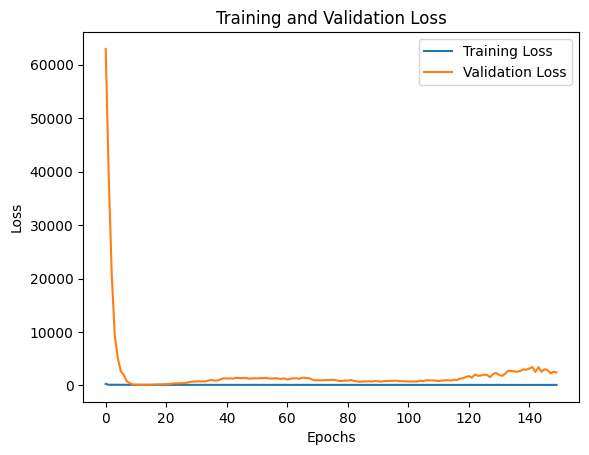

In [27]:
# Install matplotlib first (run this once)
!pip install matplotlib

# Then import and use matplotlib
import matplotlib.pyplot as plt

# Your plotting code
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [28]:
# Evaluate the model on the test data
mse = model.evaluate(X_test_scaled, y_test)

# Print the Mean Squared Error (MSE)
print(f'Mean Squared Error on test set: {mse}')


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2411.3779
Mean Squared Error on test set: 2411.3779296875


# Prediction System

In [29]:
import numpy as np

def predict_battery_life(type_discharge, Capacity, Re, Rct, label_encoder, scaler, model):
    
    # Encode the categorical feature
    type_discharge_encoded = label_encoder.transform([type_discharge])[0]
    
    # Prepare the input feature vector
    X_input = np.array([[type_discharge_encoded,Capacity, Re, Rct]])
    
    # Scale the input features using the same scaler
    X_input_scaled = scaler.transform(X_input)
    
    # Predict the battery life (ambient_temperature)
    predicted_battery_life = model.predict(X_input_scaled)
    
    return predicted_battery_life[0]

In [30]:
# Example usage of the function
type_discharge = 'discharge'  # Example input for type
Capacity = 1.674305           # Example numeric value
Re = -4.976500e+11            # Example numeric value
Rct = 1.055903e+12            # Example numeric value

# Call the prediction function
predicted_battery_life = predict_battery_life(type_discharge, Capacity, Re, Rct, label_encoder, scaler, model)

print(f"Predicted Battery Life: {predicted_battery_life}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Battery Life: [25.391468]


c:\Users\prani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [31]:
# Example usage of the function with new input values
type_discharge = 'charge'  # New input for type
Capacity = 20.5            # Example numeric value for Capacity
Re = -2.983215e+11         # Example numeric value for Re
Rct = 1.223456e+12         # Example numeric value for Rct

# Call the prediction function with these new values
predicted_battery_life = predict_battery_life(type_discharge, Capacity, Re, Rct, label_encoder, scaler, model)

# Print the predicted battery life
print(f"Predicted Battery Life: {predicted_battery_life}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Battery Life: [355.79886]


c:\Users\prani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# Save Files

In [32]:
import pickle

# Save the model, scaler, and label encoder to disk
with open('battery_life_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(label_encoder, le_file)


In [33]:
model.save("battery_life_model.h5")